# Detecting communities
Networkx has plenty of community detection algorithms: 
https://networkx.github.io/documentation/stable/reference/algorithms/community.html
## Load data

In [1]:
import random
import osmnx as ox
import networkx as nx
from networkx.algorithms import community

ox.config(log_console = True, data_folder = 'data')
graph = ox.load_graphml('nerails_simplified.graphml').to_undirected()

def plot_communities(G, C, figsize=10):
    def com_idx_of(node):
        for i, c in enumerate(C):
            if node in c:
                return i
        raise 'err'
    def colormap(node):
        return (com_idx_of(node)+1) / len(C)
        
    ox.plot_graph(
        G,
        node_color=list(map(colormap, G.nodes)),
        fig_height=figsize,
        fig_width=figsize,
        node_zorder=3,
        edge_alpha=0.2
    )

print('done')

done


## Modularity-based communities

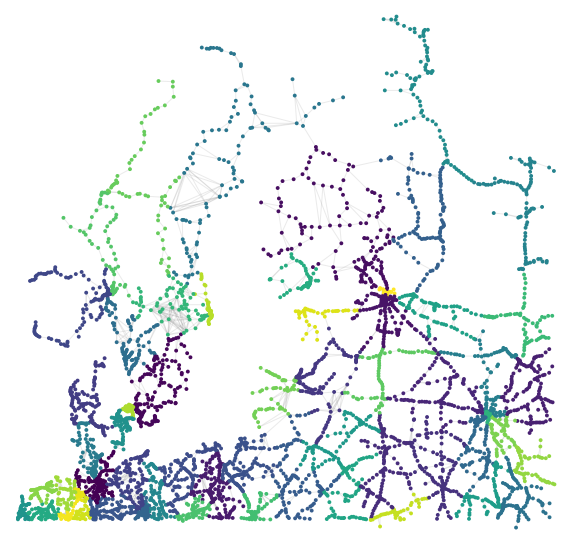

In [2]:
communities = community.greedy_modularity_communities(graph)
plot_communities(graph, communities)

## Fluid communities

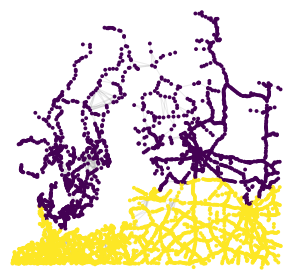

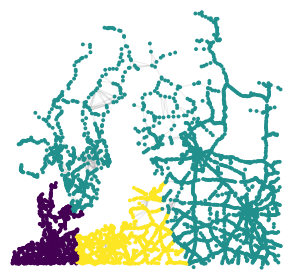

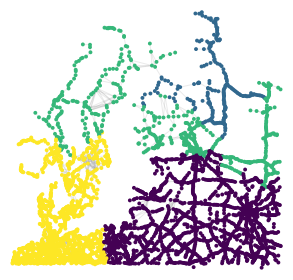

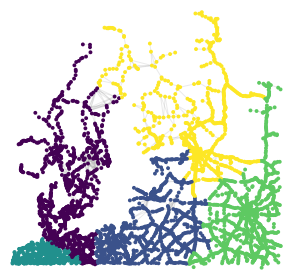

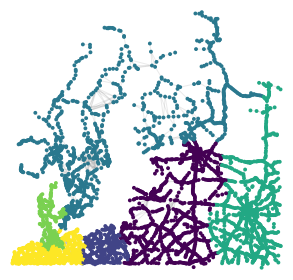

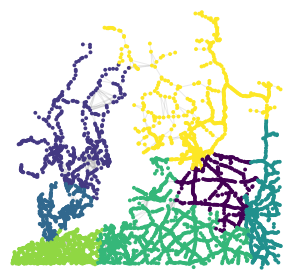

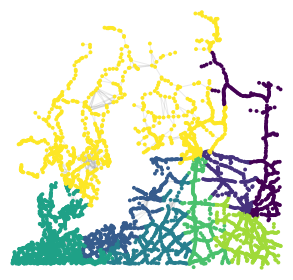

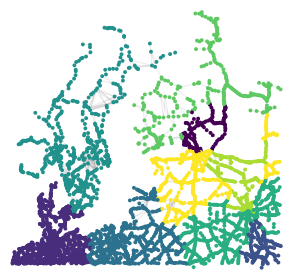

In [3]:
for i in range(2, 10):
    communities = list(community.asyn_fluidc(graph, i))
    plot_communities(graph, communities, figsize=5)